# ASSIGNMENT 2
* Nadia Syachrani
* PYTN-KS11-020
* Batch 4 - Python for Data Science

In [1]:
# IMPORT LIBRARY
import numpy as np
import pandas as pd

import seaborn as sns
sns.set(color_codes=True)

%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image

import warnings
warnings.filterwarnings('ignore')

import scipy
import scipy.stats as stats
import statistics
import statsmodels.api as sm

In [2]:
# membaca file csv dan memuat data ke dalam dataframe
df = pd.read_csv('nyc-rolling-sales.csv')
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [4]:
df = df.drop('Unnamed: 0', axis=1)
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [5]:
# mengubah nama kolom dengan setiap spasi diganti menjadi underscore
df = df.rename(columns=lambda x: x.replace(' ', '_'))

# menampilkan dataframe setelah kolom diubah
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING_CLASS_CATEGORY         84548 non-null  object
 3   TAX_CLASS_AT_PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   EASE-MENT                       84548 non-null  object
 7   BUILDING_CLASS_AT_PRESENT       84548 non-null  object
 8   ADDRESS                         84548 non-null  object
 9   APARTMENT_NUMBER                84548 non-null  object
 10  ZIP_CODE                        84548 non-null  int64 
 11  RESIDENTIAL_UNITS               84548 non-null  int64 
 12  COMMERCIAL_UNITS                84548 non-null

In [6]:
# mengubah kolom "SALE PRICE" menjadi tipe data integer
df['SALE_PRICE'] = pd.to_numeric(df['SALE_PRICE'], errors='coerce').fillna(0).astype(int)

# menampilkan dataframe setelah kolom diubah
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING_CLASS_CATEGORY         84548 non-null  object
 3   TAX_CLASS_AT_PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   EASE-MENT                       84548 non-null  object
 7   BUILDING_CLASS_AT_PRESENT       84548 non-null  object
 8   ADDRESS                         84548 non-null  object
 9   APARTMENT_NUMBER                84548 non-null  object
 10  ZIP_CODE                        84548 non-null  int64 
 11  RESIDENTIAL_UNITS               84548 non-null  int64 
 12  COMMERCIAL_UNITS                84548 non-null

In [7]:
# menghitung frekuensi dari nilai sale price
df['SALE_PRICE'].value_counts()

0          24789
10           766
450000       427
550000       416
650000       414
           ...  
191100         1
1542499        1
782990         1
2784765        1
69300          1
Name: SALE_PRICE, Length: 10007, dtype: int64

In [8]:
# karena dengan harga jual 10 itu tidak mungkin, maka
# filter data dimana SALE PRICE > 10 
df = df[df['SALE_PRICE']>10]
df

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,...,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,...,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,...,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [9]:
# melihat columns apa saja
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING_CLASS_AT_PRESENT', 'ADDRESS', 'APARTMENT_NUMBER', 'ZIP_CODE',
       'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS',
       'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE',
       'SALE_PRICE', 'SALE_DATE'],
      dtype='object')

In [10]:
df.columns.values

array(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING_CLASS_AT_PRESENT', 'ADDRESS', 'APARTMENT_NUMBER',
       'ZIP_CODE', 'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS',
       'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE',
       'SALE_PRICE', 'SALE_DATE'], dtype=object)

In [11]:
df.index.values

array([    0,     3,     4, ..., 84545, 84546, 84547], dtype=int64)

In [12]:
# menampilkan dimensi dari dataframe
df.shape

(58851, 21)

In [13]:
# mengecek apakah ada kolom yang null values?
df.isnull().any()

BOROUGH                           False
NEIGHBORHOOD                      False
BUILDING_CLASS_CATEGORY           False
TAX_CLASS_AT_PRESENT              False
BLOCK                             False
LOT                               False
EASE-MENT                         False
BUILDING_CLASS_AT_PRESENT         False
ADDRESS                           False
APARTMENT_NUMBER                  False
ZIP_CODE                          False
RESIDENTIAL_UNITS                 False
COMMERCIAL_UNITS                  False
TOTAL_UNITS                       False
LAND_SQUARE_FEET                  False
GROSS_SQUARE_FEET                 False
YEAR_BUILT                        False
TAX_CLASS_AT_TIME_OF_SALE         False
BUILDING_CLASS_AT_TIME_OF_SALE    False
SALE_PRICE                        False
SALE_DATE                         False
dtype: bool

In [14]:
# menjumlahkan kolom null
df.isna().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING_CLASS_CATEGORY           0
TAX_CLASS_AT_PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING_CLASS_AT_PRESENT         0
ADDRESS                           0
APARTMENT_NUMBER                  0
ZIP_CODE                          0
RESIDENTIAL_UNITS                 0
COMMERCIAL_UNITS                  0
TOTAL_UNITS                       0
LAND_SQUARE_FEET                  0
GROSS_SQUARE_FEET                 0
YEAR_BUILT                        0
TAX_CLASS_AT_TIME_OF_SALE         0
BUILDING_CLASS_AT_TIME_OF_SALE    0
SALE_PRICE                        0
SALE_DATE                         0
dtype: int64

In [15]:
# memunculkan borough no 1
df1 = df[df['BOROUGH']==1]
df1

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,...,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,...,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,...,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18296,1,WASHINGTON HEIGHTS UPPER,13 CONDOS - ELEVATOR APARTMENTS,2,2180,1551,,R4,105 BENNETT AVENUE,55B,...,1,0,1,-,-,1939,2,R4,560000,2017-02-22 00:00:00
18297,1,WASHINGTON HEIGHTS UPPER,13 CONDOS - ELEVATOR APARTMENTS,2,2180,1559,,R4,105 BENNETT AVENUE,64A,...,1,0,1,-,-,1939,2,R4,475000,2017-01-05 00:00:00
18298,1,WASHINGTON HEIGHTS UPPER,13 CONDOS - ELEVATOR APARTMENTS,2,2180,1565,,R4,105 BENNETT AVENUE,12HB,...,1,0,1,-,-,1939,2,R4,400530,2017-01-26 00:00:00
18300,1,WASHINGTON HEIGHTS UPPER,14 RENTALS - 4-10 UNIT,2A,2166,53,,S5,603 WEST 185TH STREET,,...,5,1,6,1450,5050,1911,2,S5,2000000,2016-11-17 00:00:00


In [16]:
# memunculkan borough no 2
df2 = df[df['BOROUGH']==2]
df2

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,...,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
18306,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,65,,A1,4455 PARK AVENUE,,...,1,0,1,1622,1587,1899,1,A1,140000,2017-05-12 00:00:00
18307,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3036,13,,A1,4348 PARK AVENUE,,...,1,0,1,3525,1764,1899,1,A1,420000,2017-02-03 00:00:00
18308,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3043,55,,A1,1948 BATHGATE AVENUE,,...,1,0,1,2356,2047,1901,1,A1,127000,2017-08-22 00:00:00
18309,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3046,52,,A1,2047 BATHGATE AVENUE,,...,1,0,1,2329,1431,1901,1,A1,273796,2016-09-21 00:00:00
18310,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3046,52,,A1,2047 BATHGATE AVENUE,,...,1,0,1,2329,1431,1901,1,A1,231244,2016-09-21 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25349,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,3398,97,,D4,"4295 WEBSTER AVENUE, 2B",,...,0,0,0,0,0,1957,2,D4,110000,2017-01-04 00:00:00
25350,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,3398,97,,D4,"4295 WEBSTER AVENUE, 4H",,...,0,0,0,0,0,1957,2,D4,205000,2017-03-01 00:00:00
25351,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,3398,97,,D4,"4295 WEBSTER AVENUE, 1A",,...,0,0,0,0,0,1957,2,D4,117000,2017-08-01 00:00:00
25352,2,WOODLAWN,22 STORE BUILDINGS,4,3365,79,,K9,63 EAST 233RD STREET,,...,1,1,2,10269,4228,1931,4,K9,1085250,2017-04-17 00:00:00


In [17]:
# memunculkan borough no 3
df3 = df[df['BOROUGH']==3]
df3

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,...,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
25355,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,157,,A5,36 BAY 10TH STREET,,...,1,0,1,1547,1428,1930,1,A5,800000,2017-02-27 00:00:00
25358,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6367,42,,S1,1730 86TH STREET,,...,1,1,2,1342,1920,1926,1,S1,1200000,2017-03-31 00:00:00
25359,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6374,67,,S1,8642 20TH AVENUE,,...,1,1,2,1740,3240,1925,1,S1,1090000,2016-10-24 00:00:00
25361,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6405,49,,S1,1863 BATH AVENUE,,...,1,1,2,1172,1800,1920,1,S1,1060000,2017-04-21 00:00:00
25362,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6406,25,,A1,1906 BENSON AVENUE,,...,1,0,1,5750,2386,1901,1,A1,2050000,2017-05-16 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49393,3,WYCKOFF HEIGHTS,27 FACTORIES,4,3319,27,,F4,326 MENAHAN STREET,,...,0,1,1,3975,4500,1931,4,F4,3425000,2017-01-12 00:00:00
49394,3,WYCKOFF HEIGHTS,29 COMMERCIAL GARAGES,4,3336,10,,GW,1519 GATES AVENUE,,...,0,3,3,16600,6750,1963,4,GW,50000,2017-03-03 00:00:00
49395,3,WYCKOFF HEIGHTS,30 WAREHOUSES,4,3176,57,,E1,361 TROUTMAN STREET,,...,0,1,1,5000,5000,1950,4,E1,1900000,2017-07-20 00:00:00
49397,3,WYCKOFF HEIGHTS,41 TAX CLASS 4 - OTHER,4,3189,1,,Z9,35 WYCKOFF AVENUE,,...,0,0,0,2431,0,0,4,Z9,5650000,2017-05-04 00:00:00


In [18]:
# memunculkan borough no 4
df4 = df[df['BOROUGH']==4]
df4

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,...,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
49402,4,AIRPORT LA GUARDIA,01 ONE FAMILY DWELLINGS,1,976,15,,A5,21-20 81ST STREET,,...,1,0,1,1800,1224,1950,1,A5,792000,2017-07-26 00:00:00
49404,4,AIRPORT LA GUARDIA,01 ONE FAMILY DWELLINGS,1,976,63,,A5,21-17 80TH STREET,,...,1,0,1,1800,1224,1950,1,A5,275500,2016-11-18 00:00:00
49405,4,AIRPORT LA GUARDIA,03 THREE FAMILY DWELLINGS,1,949,17,,C0,1914 81 STREET,,...,3,0,3,2826,1840,1940,1,C0,970000,2017-07-31 00:00:00
49406,4,AIRPORT LA GUARDIA,07 RENTALS - WALKUP APARTMENTS,2A,949,67,,C2,1949A 80TH STREET,,...,6,0,6,2400,3960,1971,2,C2,1400000,2017-05-16 00:00:00
49408,4,AIRPORT LA GUARDIA,12 CONDOS - WALKUP APARTMENTS,2,949,1012,,R2,19-45 80TH STREET,2,...,1,0,1,-,-,0,2,R2,425000,2017-01-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76095,4,WOODSIDE,30 WAREHOUSES,4,2287,1,,E1,47-59 49TH STREET,,...,0,1,1,14137,14137,1938,4,E1,1700000,2016-12-16 00:00:00
76100,4,WOODSIDE,30 WAREHOUSES,4,2287,10,,E1,47-39 49TH STREET,,...,0,1,1,8800,8800,1932,4,E1,1700000,2016-12-16 00:00:00
76102,4,WOODSIDE,43 CONDO OFFICE BUILDINGS,4,2324,1009,,RB,63-14 QUEENS BOULEVARD,AD-2A,...,0,0,1,-,-,2008,4,RB,3541753,2017-03-17 00:00:00
76111,4,WOODSIDE,43 CONDO OFFICE BUILDINGS,4,2324,1018,,RB,63-14 QUEENS BOULEVARD,AD-2K,...,0,0,1,-,-,2008,4,RB,2185531,2017-03-17 00:00:00


In [19]:
# memunculkan borough no 5
df5 = df[df['BOROUGH']==5]
df5

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,...,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
76139,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6205,22,,A5,83 EAGAN AVENUE,,...,1,0,1,1546,1579,1986,1,A5,437500,2017-05-30 00:00:00
76141,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6209,69,,A5,195 MOSELY AVENUE,,...,1,0,1,2665,1592,2007,1,A5,579000,2016-11-21 00:00:00
76143,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6211,15,,A5,17 EAGAN AVENUE,,...,1,0,1,1508,1521,1986,1,A5,370000,2016-10-14 00:00:00
76144,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6211,34,,A5,100 SEGUINE PLACE,,...,1,0,1,1550,1521,1986,1,A5,439000,2017-06-29 00:00:00
76145,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,6211,40,,A5,92 SEGUINE PLACE,,...,1,0,1,1800,1320,1986,1,A5,300000,2017-06-30 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [20]:
# memunculkan sales price
df_sp = df['SALE_PRICE']
df_sp

0         6625000
3         3936272
4         8000000
6         3192840
9        16232000
           ...   
84543      450000
84544      550000
84545      460000
84546    11693337
84547       69300
Name: SALE_PRICE, Length: 58851, dtype: int32

In [21]:
# memunculkan sales price di borough 1
df_sp1 = df1['SALE_PRICE']
df_sp1

0         6625000
3         3936272
4         8000000
6         3192840
9        16232000
           ...   
18296      560000
18297      475000
18298      400530
18300     2000000
18302     7500000
Name: SALE_PRICE, Length: 14309, dtype: int32

In [22]:
# memunculkan sales price di borough 2
df_sp2 = df2['SALE_PRICE']
df_sp2

18306     140000
18307     420000
18308     127000
18309     273796
18310     231244
          ...   
25349     110000
25350     205000
25351     117000
25352    1085250
25354    1414750
Name: SALE_PRICE, Length: 5063, dtype: int32

In [23]:
# memunculkan sales price di borough 3
df_sp3 = df3['SALE_PRICE']
df_sp3

25355     800000
25358    1200000
25359    1090000
25361    1060000
25362    2050000
          ...   
49393    3425000
49394      50000
49395    1900000
49397    5650000
49400    2825000
Name: SALE_PRICE, Length: 15397, dtype: int32

In [24]:
# memunculkan sales price di borough 4
df_sp4 = df4['SALE_PRICE']
df_sp4

49402     792000
49404     275500
49405     970000
49406    1400000
49408     425000
          ...   
76095    1700000
76100    1700000
76102    3541753
76111    2185531
76136     831250
Name: SALE_PRICE, Length: 18179, dtype: int32

In [25]:
# memunculkan sales price di borough 5
df_sp5 = df5['SALE_PRICE']
df_sp5

76139      437500
76141      579000
76143      370000
76144      439000
76145      300000
           ...   
84543      450000
84544      550000
84545      460000
84546    11693337
84547       69300
Name: SALE_PRICE, Length: 5903, dtype: int32

-------------------------------

# Measure of Central Tendency

## Mean
"Mean" adalah istilah dalam statistik yang merujuk pada nilai rata-rata dari kumpulan data numerik. Untuk menghitung mean, jumlahkan semua nilai dalam kumpulan data dan bagi hasilnya dengan jumlah data yang ada. 

In [26]:
# menghitung rata-rata harga penjualan properti menggunakan pandas
mean_ = df_sp.mean()

# menampilkan hasil
print('Rata-rata harga penjualan properti adalah : $', "{:,.2f}".format(mean_))

Rata-rata harga penjualan properti adalah : $ 1,480,439.64


In [27]:
# manual
"{:,.2f}".format((df_sp.sum())/df_sp.count())

'1,480,439.64'

In [28]:
# menghitung mean/rata-rata di setiap borough yang ada di NYC menggunakan numpy
mean_1 = np.mean(df_sp1)
mean_2 = np.mean(df_sp2)
mean_3 = np.mean(df_sp3)
mean_4 = np.mean(df_sp4)
mean_5 = np.mean(df_sp5)

# menampilkan hasil
print('Rata-rata harga penjualan pada borough 1 adalah : $', "{:,.2f}".format(mean_1))
print('Rata-rata harga penjualan pada borough 2 adalah : $', "{:,.2f}".format(mean_2))
print('Rata-rata harga penjualan pada borough 3 adalah : $', "{:,.2f}".format(mean_3))
print('Rata-rata harga penjualan pada borough 4 adalah : $', "{:,.2f}".format(mean_4))
print('Rata-rata harga penjualan pada borough 5 adalah : $', "{:,.2f}".format(mean_5))

Rata-rata harga penjualan pada borough 1 adalah : $ 3,213,828.88
Rata-rata harga penjualan pada borough 2 adalah : $ 821,701.37
Rata-rata harga penjualan pada borough 3 adalah : $ 1,303,301.90
Rata-rata harga penjualan pada borough 4 adalah : $ 750,572.22
Rata-rata harga penjualan pada borough 5 adalah : $ 553,415.19


In [29]:
# menampilkan rata-rata tertinggi di borough mana?
max_val_mean = mean_1 # asumsikan nilai terbesar adalah mean_1
max_var_mean = "borough 1" # asumsikan variabel dengan nilai terbesar adalah borough 1

# loop untuk membandingkan nilai variabel lain dengan a
for var, val in {"borough 2": mean_2, "borough 3": mean_3, "borough 4": mean_4, "borough 5": mean_5}.items():
    if val > max_val_mean:
        max_val_mean = val
        max_var_mean = var

print("Rata-rata tertinggi sale price berada di ", max_var_mean,
      "dengan harga rata-ratanya $", "{:,.2f}".format(max_val_mean))

Rata-rata tertinggi sale price berada di  borough 1 dengan harga rata-ratanya $ 3,213,828.88


In [30]:
# manual
"{:,.2f}".format((df_sp1.sum())/df_sp1.count())

'3,213,828.88'

### Analisis Mean :
* Rata-rata harga penjualan properti di NYC adalah sebesar $1.480.439,64

* sedangkan secara rinci pada borough 1 merupakan rata rata penjualan terbesar diantara borough lainnya yaitu sebesar $3.213.828,88
* Hal ini menunjukkan bahwa rata-rata harga penjualan properti di New York City pada borough 1 adalah diatas rata-rata (cenderung tinggi)

## Median
"Median" adalah istilah dalam statistik yang merujuk pada nilai tengah dari sebuah kumpulan data yang telah diurutkan berdasarkan urutan nilai yang berbeda. Dalam urutan data yang terdiri dari bilangan ganjil, median adalah nilai tengah dari urutan data tersebut. Sedangkan dalam urutan data yang terdiri dari bilangan genap, median adalah rata-rata dari dua nilai tengah pada urutan data tersebut.

In [31]:
# Menghitung median sale price di NYC menggunakan numpy
median = np.median(df_sp)

# Menampilkan median
print("Median dari sale price di NYC adalah : $", "{:,.2f}".format(median))

Median dari sale price di NYC adalah : $ 635,000.00


In [32]:
# Menghitung median  di setiap borough yang ada di NYC menggunakan numpy
med_1 = np.median(df_sp1)
med_2 = np.median(df_sp2)
med_3 = np.median(df_sp3)
med_4 = np.median(df_sp4)
med_5 = np.median(df_sp5)

# menampilkan hasil
print('Median harga penjualan pada borough 1 adalah : $', "{:,.2f}".format(med_1))
print('Median harga penjualan pada borough 2 adalah : $', "{:,.2f}".format(med_2))
print('Median harga penjualan pada borough 3 adalah : $', "{:,.2f}".format(med_3))
print('Median harga penjualan pada borough 4 adalah : $', "{:,.2f}".format(med_4))
print('Median harga penjualan pada borough 5 adalah : $', "{:,.2f}".format(med_5))

Median harga penjualan pada borough 1 adalah : $ 1,165,000.00
Median harga penjualan pada borough 2 adalah : $ 405,000.00
Median harga penjualan pada borough 3 adalah : $ 770,000.00
Median harga penjualan pada borough 4 adalah : $ 500,000.00
Median harga penjualan pada borough 5 adalah : $ 468,468.00


In [33]:
# menampilkan median sale price tertinggi di borough mana?
max_val_med = med_1 # asumsikan nilai terbesar adalah median_1
max_var_med = "borough 1" # asumsikan variabel dengan nilai terbesar adalah borough 1

# loop untuk membandingkan nilai variabel lain dengan med 1
for var, val in {"borough 2": med_2, "borough 3": med_3, "borough 4": med_4, "borough 5": med_5}.items():
    if val > max_val_med:
        max_val_med = val
        max_var_med = var

print("Median tertinggi sale price berada di ", max_var_med, 
      "dengan nilai mediannya adalah $", "{:,.2f}".format(max_val_med))

Median tertinggi sale price berada di  borough 1 dengan nilai mediannya adalah $ 1,165,000.00


### Analisis Median :
* Hasil output dari median harga jual properti di kota New York secara keseluruhan adalah $ 635.000 .

* bahwa setengah dari semua penjualan properti di kota New York dilakukan dengan harga di atas $ 635.000

* dan setengah lagi dilakukan dengan harga di bawahnya
* sedangkan median harga jual tertinggi ada di borough 1 sebesar $ 1.165,000
* hal ini berarti pada borough 1 ini nilai mediannya lebih besar dari pada median harga jual di keseluruhan kota new york

## Modus
"Modus" adalah istilah dalam statistik yang merujuk pada nilai yang paling sering muncul atau frekuensi terbanyak dalam sebuah kumpulan data. Modus dapat ditemukan dengan menghitung frekuensi kemunculan setiap nilai dalam kumpulan data dan mencari nilai yang memiliki frekuensi kemunculan paling banyak.

In [34]:
# MENGHITUNG MODUS DARI SALE PRICE DI NYC PROPERTY SALE

# menghitung frekuensi dari nilai sale price
df_freq_sp = df_sp.value_counts()

# menghitung modus dari SALE PRICE
df_mode_sp = df_sp.mode()[0]

# Menampilkan modus di borough 5
print("Sale price yang paling sering muncul adalah $", "{:,.2f}".format(df_mode_sp), 
      "dengan frekuensi sebanyak", df_freq_sp[df_mode_sp])

Sale price yang paling sering muncul adalah $ 450,000.00 dengan frekuensi sebanyak 427


In [35]:
# pembuktian
df['SALE_PRICE'].value_counts()

450000     427
550000     416
650000     414
600000     409
700000     382
          ... 
191100       1
811000       1
782990       1
2784765      1
69300        1
Name: SALE_PRICE, Length: 9999, dtype: int64

In [36]:
# Menghitung modus di setiap borough yang ada di NYC menggunakan pandas
mod_1 = df_sp1.mode()[0]
mod_2 = df_sp2.mode()[0]
mod_3 = df_sp3.mode()[0]
mod_4 = df_sp4.mode()[0]
mod_5 = df_sp5.mode()[0]

# Menghitung frekuensi di setiap borough yang ada di NYC menggunakan pandas
freq_sp1 = df_sp1.value_counts()
freq_sp2 = df_sp2.value_counts()
freq_sp3 = df_sp3.value_counts()
freq_sp4 = df_sp4.value_counts()
freq_sp5 = df_sp5.value_counts()

# menampilkan hasil
print('Sale price yang paling sering muncul pada borough 1 adalah : $', "{:,.2f}".format(mod_1),
      "dengan frekuensi sebanyak", freq_sp1[mod_1])
print('Sale price yang paling sering muncul pada borough 2 adalah : $', "{:,.2f}".format(mod_2),
      "dengan frekuensi sebanyak", freq_sp2[mod_2])
print('Sale price yang paling sering muncul pada borough 3 adalah : $', "{:,.2f}".format(mod_3),
      "dengan frekuensi sebanyak", freq_sp3[mod_3])
print('Sale price yang paling sering muncul pada borough 4 adalah : $', "{:,.2f}".format(mod_4),
      "dengan frekuensi sebanyak", freq_sp4[mod_4])
print('Sale price yang paling sering muncul pada borough 5 adalah : $', "{:,.2f}".format(mod_5),
      "dengan frekuensi sebanyak", freq_sp5[mod_5])

Sale price yang paling sering muncul pada borough 1 adalah : $ 1,100,000.00 dengan frekuensi sebanyak 89
Sale price yang paling sering muncul pada borough 2 adalah : $ 500,000.00 dengan frekuensi sebanyak 61
Sale price yang paling sering muncul pada borough 3 adalah : $ 650,000.00 dengan frekuensi sebanyak 132
Sale price yang paling sering muncul pada borough 4 adalah : $ 450,000.00 dengan frekuensi sebanyak 158
Sale price yang paling sering muncul pada borough 5 adalah : $ 450,000.00 dengan frekuensi sebanyak 72


In [37]:
# menampilkan median sale price tertinggi di borough mana?
max_val_mod = mod_1 # asumsikan nilai terbesar adalah modus_1
max_var_mod = "borough 1" # asumsikan variabel dengan nilai terbesar adalah borough 1

# loop untuk membandingkan nilai variabel lain dengan mod_1
for var, val in {"borough 2": mod_2, "borough 3": mod_3, "borough 4": mod_4, "borough 5": mod_5}.items():
    if val > max_val_mod:
        max_val_mod = val
        max_var_mod = var

print("Modus tertinggi sale price berada di ", max_var_mod, 
      "dengan nilai modusnya adalah $", "{:,.2f}".format(max_val_mod))

Modus tertinggi sale price berada di  borough 1 dengan nilai modusnya adalah $ 1,100,000.00


### Analisis Modus : 
* Berdasarkan data pada dataset NYC Property Sales, modus sale price adalah $450.000 

* yang berarti bahwa jumlah transaksi dengan harga $450000 

* paling sering terjadi sebanyak 427 kali
* sedangkan modus sale price tertinggi ada pada borough 1 yaitu dengan harga $1.100.000

* hal ini berarti pada borough 1 ini nilai modusnya lebih besar dari pada modus harga jual di keseluruhan kota new york

----------------------------------------

# Measure of Spread

## Range
"Range" adalah istilah dalam statistik yang merujuk pada selisih antara nilai terbesar dan nilai terkecil dalam sebuah kumpulan data numerik. Range digunakan untuk mengukur seberapa besar variasi atau rentang data dalam suatu kumpulan data.

Untuk menghitung range, kita perlu menentukan nilai terbesar dan nilai terkecil dalam kumpulan data dan kemudian mengurangi nilai terkecil dari nilai terbesar. 

In [38]:
# Menghitung Range dari sale price di NYC
df_rang = np.ptp(df_sp)

print('Range dari sale price di NYC adalah $', "{:,.2f}".format(df_rang))

Range dari sale price di NYC adalah $ 1,039,999,981.00


In [39]:
# pembuktian
"{:,.2f}".format(np.amax(df_sp) - np.amin(df_sp))

'1,039,999,981.00'

In [40]:
# Menghitung Range dari sale price di setiap borough NYC menggunakan numpy
rang_1 = np.ptp(df_sp1)
rang_2 = np.ptp(df_sp2)
rang_3 = np.ptp(df_sp3)
rang_4 = np.ptp(df_sp4)
rang_5 = np.ptp(df_sp5)

# menampilkan hasil
print('Range dari sale price pada borough 1 adalah $',"{:,.2f}".format(rang_1))
print('Range dari sale price pada borough 2 adalah $',"{:,.2f}".format(rang_2))
print('Range dari sale price pada borough 3 adalah $',"{:,.2f}".format(rang_3))
print('Range dari sale price pada borough 4 adalah $',"{:,.2f}".format(rang_4))
print('Range dari sale price pada borough 5 adalah $',"{:,.2f}".format(rang_5))

Range dari sale price pada borough 1 adalah $ 1,039,999,900.00
Range dari sale price pada borough 2 adalah $ 109,999,900.00
Range dari sale price pada borough 3 adalah $ 344,999,980.00
Range dari sale price pada borough 4 adalah $ 257,499,981.00
Range dari sale price pada borough 5 adalah $ 121,999,900.00


In [41]:
# menampilkan range sale price tertinggi di borough mana?
max_val_rang = rang_1 # asumsikan nilai terbesar adalah range_1
max_var_rang = "borough 1" # asumsikan variabel dengan nilai terbesar adalah borough 1

# loop untuk membandingkan nilai variabel lain dengan med 1
for var, val in {"borough 2": rang_2, "borough 3": rang_3, "borough 4": rang_4, "borough 5": rang_5}.items():
    if val > max_val_rang:
        max_val_rang = val
        max_var_rang = var

print("Range tertinggi sale price berada di ", max_var_rang, 
      "dengan nilai rangenya adalah $", "{:,.2f}".format(max_val_rang))

Range tertinggi sale price berada di  borough 1 dengan nilai rangenya adalah $ 1,039,999,900.00


### Analisis Range :
* rentang/range harga jual proprty di New york adalah $1.039.999.981

* menunjukkan bahwa terdapat variasi yang signifikan dalam harga jual properti di New York City
* sedangkan range tertinggi ada pada borough 1 denganrentang harga jual sekitar $1.039.999.900

* hal ini berarti pada borough 1 ini nilai rangenya lebih kecil dari pada range harga jual di keseluruhan kota new york (beda $81)

## Variance
"Variance" adalah istilah dalam statistik yang mengukur seberapa jauh nilai-nilai dalam sebuah kumpulan data tersebar dari nilai rata-rata atau mean. Variance digunakan untuk mengukur seberapa bervariasi data dalam kumpulan data numerik.

Variance = Σ (xi - mean)² / (n - 1)

In [42]:
# Menghitung Variance dari sale price di NYC menggunakan numpy
df_var = np.var(df_sp,ddof=1)

print('Variance dari sale price di NYC adalah $', "{:,.2f}".format(df_var))

Variance dari sale price di NYC adalah $ 71,448,041,179,271.67


In [43]:
# Menghitung variance dari sale price di setiap borough NYC menggunakan numpy
var_1 = np.var(df_sp1,ddof=1)
var_2 = np.var(df_sp2,ddof=1)
var_3 = np.var(df_sp3,ddof=1)
var_4 = np.var(df_sp4,ddof=1)
var_5 = np.var(df_sp5,ddof=1)

# menampilkan hasil
print('Variance dari sale price pada borough 1 adalah $',"{:,.2f}".format(var_1))
print('Variance dari sale price pada borough 2 adalah $',"{:,.2f}".format(var_2))
print('Variance dari sale price pada borough 3 adalah $',"{:,.2f}".format(var_3))
print('Variance dari sale price pada borough 4 adalah $',"{:,.2f}".format(var_4))
print('Variance dari sale price pada borough 5 adalah $',"{:,.2f}".format(var_5))

Variance dari sale price pada borough 1 adalah $ 245,539,293,927,692.25
Variance dari sale price pada borough 2 adalah $ 10,593,939,079,258.29
Variance dari sale price pada borough 3 adalah $ 23,582,747,121,015.05
Variance dari sale price pada borough 4 adalah $ 10,600,730,176,751.94
Variance dari sale price pada borough 5 adalah $ 3,677,392,472,476.68


In [44]:
# menampilkan variance sale price tertinggi di borough mana?
max_val_var = var_1 # asumsikan nilai terbesar adalah var_1
max_var_var = "borough 1" # asumsikan variabel dengan nilai terbesar adalah borough 1

# loop untuk membandingkan nilai variabel lain dengan med 1
for var, val in {"borough 2": var_2, "borough 3": var_3, "borough 4": var_4, "borough 5": var_5}.items():
    if val > max_val_var:
        max_val_var = val
        max_var_var = var

print("Variance tertinggi sale price berada di ", max_var_var, 
      "dengan nilai variancenya adalah $", "{:,.2f}".format(max_val_var))

Variance tertinggi sale price berada di  borough 1 dengan nilai variancenya adalah $ 245,539,293,927,692.25


### Analisis Variance :
* variance harga jual proprty di New york adalah $71.448.041.179.271,67

* sedangkan variance tertinggi ada pada borough 1 dengan variance harga jual sekitar $245.539.293.927.692,25

* hal ini berarti pada borough 1 ini nilai variance lebih besar dari pada variance harga jual di keseluruhan kota new york

## Standard Deviation
"Standard deviation" adalah istilah dalam statistik yang mengukur seberapa jauh nilai-nilai dalam sebuah kumpulan data tersebar dari nilai rata-rata atau mean dalam satuan standar deviasi. standard deviation adalah akar kuadrat dari variance. 

Standard deviation = √Variance = √(Σ(xi - mean)² / (n - 1))

In [45]:
# Menghitung Standard Deviation dari sale price di NYC menggunakan numpy
df_stdev = np.std(df_sp,ddof=1)

print('Standard Deviation dari sale price di NYC adalah $', "{:,.2f}".format(df_stdev))

Standard Deviation dari sale price di NYC adalah $ 8,452,694.31


In [46]:
print('standard deviation dari sale price di NYC dari hasil variance adalah $:', "{:,.2f}".format(np.sqrt(df_var)))

standard deviation dari sale price di NYC dari hasil variance adalah $: 8,452,694.31


In [47]:
# Menghitung standard deviation dari sale price di setiap borough NYC menggunakan numpy
stdev_1 = np.std(df_sp1,ddof=1)
stdev_2 = np.std(df_sp2,ddof=1)
stdev_3 = np.std(df_sp3,ddof=1)
stdev_4 = np.std(df_sp4,ddof=1)
stdev_5 = np.std(df_sp5,ddof=1)

# menampilkan hasil
print('Standard Deviation dari sale price pada borough 1 adalah $',"{:,.2f}".format(stdev_1))
print('Standard Deviation dari sale price pada borough 1 adalah $',"{:,.2f}".format(stdev_2))
print('Standard Deviation dari sale price pada borough 1 adalah $',"{:,.2f}".format(stdev_3))
print('Standard Deviation dari sale price pada borough 1 adalah $',"{:,.2f}".format(stdev_4))
print('Standard Deviation dari sale price pada borough 1 adalah $',"{:,.2f}".format(stdev_5))

Standard Deviation dari sale price pada borough 1 adalah $ 15,669,693.49
Standard Deviation dari sale price pada borough 1 adalah $ 3,254,833.19
Standard Deviation dari sale price pada borough 1 adalah $ 4,856,207.07
Standard Deviation dari sale price pada borough 1 adalah $ 3,255,876.25
Standard Deviation dari sale price pada borough 1 adalah $ 1,917,652.86


In [48]:
# menampilkan standard deviation sale price tertinggi di borough mana?
max_val_stdev = stdev_1 # asumsikan nilai terbesar adalah stdev_1
max_var_stdev = "borough 1" # asumsikan variabel dengan nilai terbesar adalah borough 1

# loop untuk membandingkan nilai variabel lain dengan med 1
for var, val in {"borough 2": stdev_2, "borough 3": stdev_3, "borough 4": stdev_4, "borough 5": stdev_5}.items():
    if val > max_val_stdev:
        max_val_stdev = val
        max_var_stdev = var

print("Standard Deviation tertinggi sale price berada di ", max_var_stdev, 
      "dengan nilai standard deviation adalah $", "{:,.2f}".format(max_val_stdev))

Standard Deviation tertinggi sale price berada di  borough 1 dengan nilai standard deviation adalah $ 15,669,693.49


### Analisis Standard Deviation :
* standard deviation harga jual proprty di New york adalah $8.452.694,31

* sedangkan standard deviation tertinggi ada pada borough 1 dengan standard deviation harga jual sekitar $15.669.693,49

* hal ini berarti pada borough 1 ini nilai standard deviation lebih besar dari pada standard deviation harga jual di keseluruhan kota new york

## Skewness

In [49]:
# Menghitung Skewness dari sale price di NYC menggunakan pandas
skew_1 = pd.Series(df_sp)
print('Skewness dari sale price di NYC dengan menggunakan pandas adalah $', "{:,.2f}".format(skew_1.skew()))

Skewness dari sale price di NYC dengan menggunakan pandas adalah $ 59.28


In [50]:
import scipy

In [51]:
# Menghitung Skewness dari sale price di NYC menggunakan scipy
skew_2 = scipy.stats.skew(df_sp,bias=False)
print('Skewness dari sale price di NYC dengan menggunakan scipy adalah $', "{:,.2f}".format(skew_2))

Skewness dari sale price di NYC dengan menggunakan scipy adalah $ 59.28


---------------------------------

# Probability Distribution
"Probability distribution" atau distribusi probabilitas adalah istilah dalam statistik yang merujuk pada suatu fungsi yang menghubungkan setiap nilai dalam suatu kumpulan data dengan probabilitas terjadinya nilai tersebut. Dengan kata lain, probability distribution digunakan untuk menggambarkan sebaran probabilitas dari suatu kumpulan data atau variabel acak.

menganalisa distribusi data dan menarik informasi

In [52]:
from scipy.stats import norm

In [53]:
len(df_sp)

58851

In [54]:
data_sp = df[['SALE_PRICE']]
data_sp

,SALE_PRICE
0,6625000
3,3936272
4,8000000
6,3192840
9,16232000
...,...
84543,450000
84544,550000
84545,460000
84546,11693337


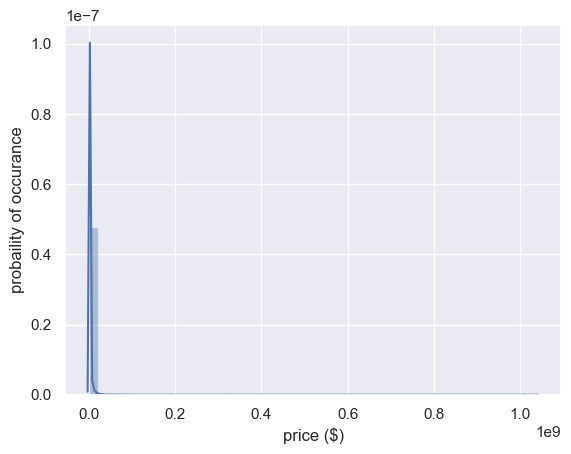

In [55]:
sns.distplot(data_sp['SALE_PRICE'])
plt.ylabel('probaility of occurance')
plt.xlabel('price ($)')
plt.show()

<AxesSubplot:ylabel='Density'>

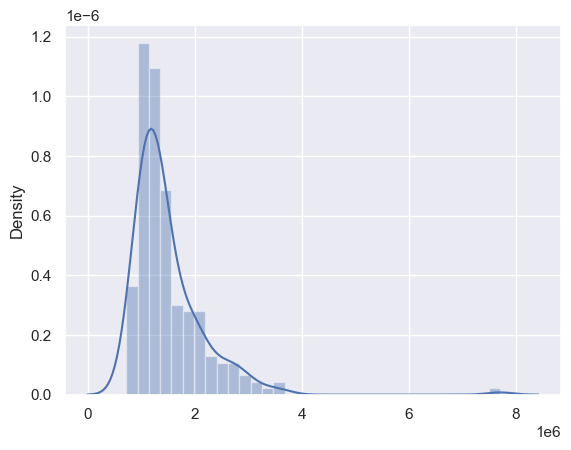

In [56]:
# mengambil 220 sampel masing-masing sebanyak 100 per sampel
n = 100
sample_means=[]
for sample in range(0,220):
    sample_values =data_sp['SALE_PRICE'].sample(n)
    sample_mean = sample_values.mean()
    sample_means.append(sample_mean)

sns.distplot(sample_means)

In [57]:
data_sp['SALE_PRICE'].sample(10)

26377     385000
27540    1221900
19263     590000
47970    1669345
12483     799000
70096     420000
80833     438000
61527     230000
73093    1175000
78683     475000
Name: SALE_PRICE, dtype: int32

In [58]:
# stdev
population_std = data_sp['SALE_PRICE'].std(ddof=1)

# menampilkan hasil
print('Standard Deviation dari populasi sale price adalah $',"{:,.2f}".format(population_std))

Standard Deviation dari populasi sale price adalah $ 8,452,694.31


In [59]:
# Mean dan Median dari sampel sale price
mean_of_sample_means = np.mean(sample_means)
median_of_sample_means = np.median(sample_means)
mean_of_sample_means, median_of_sample_means

# menampilkan hasil
print('Mean dari sampel sale price adalah $',"{:,.2f}".format(mean_of_sample_means))
print('Median dari sampel sale price adalah $',"{:,.2f}".format(median_of_sample_means))

Mean dari sampel sale price adalah $ 1,493,982.90
Median dari sampel sale price adalah $ 1,277,380.68


In [60]:
# Mean dari populasi sale price
population_mean = data_sp['SALE_PRICE'].mean()

# Menampilkan hasil
print('Mean dari populasi sale price adalah $',"{:,.2f}".format(population_mean))

Mean dari populasi sale price adalah $ 1,480,439.64


In [61]:
# Standard dari sampel sale price
std_of_sample_means = np.std(sample_means)

# Menampilkan hasil
print('Standard dari sampel sale price adalah $',"{:,.2f}".format(std_of_sample_means))

Standard dari sampel sale price adalah $ 705,628.47


In [62]:
# Standard erro dari sale price
std_error = population_std/np.sqrt(n)

# Menampilkan hasil
print('Standard dari sampel sale price adalah $',"{:,.2f}".format(std_error))

Standard dari sampel sale price adalah $ 845,269.43


### Analisis Probaility Distribution :
* standard deviation dari rata-rata sample sebesar $ 725,916.61

* standard error sebesar $ 845,269.43

* dari hasil diatas terdapat perbedaan, artinya sampel memiliki karakteristik yang berbeda dengan populasi

-------------------------------

# Confidence Intervals

In [63]:
# menampilkan hasil mean dan stdev yang sudah dihitung sebelumnya
print('Rata-rata harga penjualan properti adalah : $', "{:,.2f}".format(mean_))
print('Standard Deviation dari sale price di NYC adalah $', "{:,.2f}".format(df_stdev))

Rata-rata harga penjualan properti adalah : $ 1,480,439.64
Standard Deviation dari sale price di NYC adalah $ 8,452,694.31


In [64]:
# calculate margin of error and confidence interval
z_score = 1.96 # z-score for 95% confidence interval
margin_of_error = z_score * (df_stdev / np.sqrt(len(df_sp)))
lower_bound = mean_ - margin_of_error
upper_bound = mean_ + margin_of_error

# menampilkan hasil mean dan stdev yang sudah dihitung sebelumnya
print('margin of errornya adalah : ', "{:,.2f}".format(margin_of_error))
print('lower bound nya adalah adalah : ', "{:,.2f}".format(lower_bound))
print('upper bound nya adalah adalah : ', "{:,.2f}".format(upper_bound))

margin of errornya adalah :  68,292.70
lower bound nya adalah adalah :  1,412,146.93
upper bound nya adalah adalah :  1,548,732.34


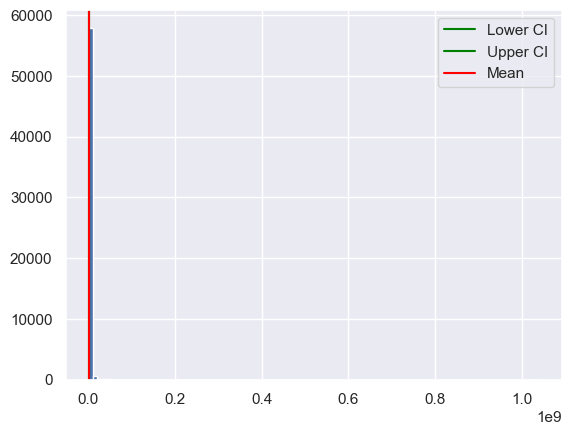

In [65]:
# plot histogram with confidence interval
plt.hist(df_sp, bins=100)
plt.axvline(lower_bound, color='green', label='Lower CI')
plt.axvline(upper_bound, color='green', label='Upper CI')
plt.axvline(mean_, color='red', label='Mean')
plt.legend()
plt.show()

-------------------------------

# Hypothesis Testing

In [66]:
df1

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,...,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,...,8,0,8,1750,4226,1920,2,C4,3192840,2016-09-23 00:00:00
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,...,24,0,24,4489,18523,1920,2,D9,16232000,2016-11-07 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18296,1,WASHINGTON HEIGHTS UPPER,13 CONDOS - ELEVATOR APARTMENTS,2,2180,1551,,R4,105 BENNETT AVENUE,55B,...,1,0,1,-,-,1939,2,R4,560000,2017-02-22 00:00:00
18297,1,WASHINGTON HEIGHTS UPPER,13 CONDOS - ELEVATOR APARTMENTS,2,2180,1559,,R4,105 BENNETT AVENUE,64A,...,1,0,1,-,-,1939,2,R4,475000,2017-01-05 00:00:00
18298,1,WASHINGTON HEIGHTS UPPER,13 CONDOS - ELEVATOR APARTMENTS,2,2180,1565,,R4,105 BENNETT AVENUE,12HB,...,1,0,1,-,-,1939,2,R4,400530,2017-01-26 00:00:00
18300,1,WASHINGTON HEIGHTS UPPER,14 RENTALS - 4-10 UNIT,2A,2166,53,,S5,603 WEST 185TH STREET,,...,5,1,6,1450,5050,1911,2,S5,2000000,2016-11-17 00:00:00


In [67]:
df3

,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APARTMENT_NUMBER,...,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
25355,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,157,,A5,36 BAY 10TH STREET,,...,1,0,1,1547,1428,1930,1,A5,800000,2017-02-27 00:00:00
25358,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6367,42,,S1,1730 86TH STREET,,...,1,1,2,1342,1920,1926,1,S1,1200000,2017-03-31 00:00:00
25359,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6374,67,,S1,8642 20TH AVENUE,,...,1,1,2,1740,3240,1925,1,S1,1090000,2016-10-24 00:00:00
25361,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6405,49,,S1,1863 BATH AVENUE,,...,1,1,2,1172,1800,1920,1,S1,1060000,2017-04-21 00:00:00
25362,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6406,25,,A1,1906 BENSON AVENUE,,...,1,0,1,5750,2386,1901,1,A1,2050000,2017-05-16 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49393,3,WYCKOFF HEIGHTS,27 FACTORIES,4,3319,27,,F4,326 MENAHAN STREET,,...,0,1,1,3975,4500,1931,4,F4,3425000,2017-01-12 00:00:00
49394,3,WYCKOFF HEIGHTS,29 COMMERCIAL GARAGES,4,3336,10,,GW,1519 GATES AVENUE,,...,0,3,3,16600,6750,1963,4,GW,50000,2017-03-03 00:00:00
49395,3,WYCKOFF HEIGHTS,30 WAREHOUSES,4,3176,57,,E1,361 TROUTMAN STREET,,...,0,1,1,5000,5000,1950,4,E1,1900000,2017-07-20 00:00:00
49397,3,WYCKOFF HEIGHTS,41 TAX CLASS 4 - OTHER,4,3189,1,,Z9,35 WYCKOFF AVENUE,,...,0,0,0,2431,0,0,4,Z9,5650000,2017-05-04 00:00:00


#### uji apakah rata-rata sale price di borough 1 lebih tinggi dari borough 3

h0  = rata-rata sale price tidak lebih tinggi signifikan dari borough 3

h1 = rata-rata sale price lebih tinggi signifikan dari borough 3

----
h0 : mean_1 <= mean_3

H1 : mean_1 > mean_3

In [68]:
# BOROUGH 1
print('Jumlah data pada borough 1 adalah :', "{:,.2f}".format(len(df_sp1)))
print('Rata-rata harga penjualan pada borough 1 adalah : $', "{:,.2f}".format(mean_1))
print('Standard Deviation harga penjualan pada borough 1 adalah : $', "{:,.2f}".format(stdev_1))

Jumlah data pada borough 1 adalah : 14,309.00
Rata-rata harga penjualan pada borough 1 adalah : $ 3,213,828.88
Standard Deviation harga penjualan pada borough 1 adalah : $ 15,669,693.49


In [69]:
# BOROUGH 3
print('Jumlah data pada borough 1 adalah :', "{:,.2f}".format(len(df_sp3)))
print('Rata-rata harga penjualan pada borough 1 adalah : $', "{:,.2f}".format(mean_3))
print('Standard Deviation harga penjualan pada borough 1 adalah : $', "{:,.2f}".format(stdev_3))

Jumlah data pada borough 1 adalah : 15,397.00
Rata-rata harga penjualan pada borough 1 adalah : $ 1,303,301.90
Standard Deviation harga penjualan pada borough 1 adalah : $ 4,856,207.07


In [70]:
alpha = 0.05
sp_hypo = sm.stats.ztest(df_sp1.dropna(),df_sp3.dropna(),alternative='larger')
sp_hypo

(14.403068130414784, 2.474825984988155e-47)

In [71]:
if sp_hypo[1]>alpha:
    print('accept nul hypotesis (ho) mean of sale price borough 1 is not larger than borough 3')
else:
    print('reject null hypotesis (h0) mean of sale price borough 1 is larger than borough 3')

reject null hypotesis (h0) mean of sale price borough 1 is larger than borough 3


#### uji apakah rata-rata sale price di borough 1 tidak sama dengan borough 3
h0 : mean_1 = mean_3

H1 : mean_1 != mean_

In [72]:
sp_hypo2 = sm.stats.ztest(df_sp1.dropna(),df_sp3.dropna(),alternative='two-sided')
sp_hypo2

(14.403068130414784, 4.94965196997631e-47)

In [73]:
if sp_hypo2[1]>alpha:
    print('accept nul hypotesis (ho) mean of sale price borough 1 is same borough 3')
else:
    print('reject null hypotesis (h0) mean of sale price borough 1 is not same borough 3')

reject null hypotesis (h0) mean of sale price borough 1 is not same borough 3


-------------------------------

# OVERALL ANALYSIS

* Rata-rata harga penjualan properti di NYC sebesar $1.480.439,64

* Median harga jual properti di NYC sebesar  $ 635.000

* Modus harga jual properti di NYC sebesar  $450.000

* Range harga jual properti di NYC sebesar $1.039.999.981

* Variance harga jual properti di NYC sebesar 71.448.041.179.271,67

* Standard deviation harga jual properti di NYC sebesar $8.452.694,31

* Harga jual properti di borough 1 NYC secara mean, median, modus, range, variance, dan standard deviation memiliki nilai yang lebih tinggi dari borough lainnya (2,3,4)

* Dengan probability distribution sampel memiliki karakteristik yang berbeda dengan populasi

* Confidence interval untuk margin of errornya sebesar 68,292.12

* Confidence interval untuk lower bound nya adalah sebesar 1,412,147.51

* Confidence interval untuk upper bound nya adalah sebesar 1,548,731.76

* Pada hypothesis testing untuk rata-rata harga jual di borough 1 lebih besar dari rata-rata harga jual di borough 3

* Pada hypothesis testing untuk rata-rata harga jual di borough 1 tidak sama dengan rata-rata harga jual di borough 3

Nadia Syachrani - PYTN-KS11-020